In [1]:
import pandas as pd

heart = pd.read_csv('heart_disease.csv')

clean_heart = heart.dropna()

clean_heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


|--- ST_Slope_Up <= 0.50
|   |--- ChestPainType_ASY <= 0.50
|   |   |--- Sex_M <= 0.50
|   |   |   |--- class: 0
|   |   |--- Sex_M >  0.50
|   |   |   |--- class: 1
|   |--- ChestPainType_ASY >  0.50
|   |   |--- class: 1
|--- ST_Slope_Up >  0.50
|   |--- Cholesterol <= 42.50
|   |   |--- class: 1
|   |--- Cholesterol >  42.50
|   |   |--- ExerciseAngina_Y <= 0.50
|   |   |   |--- class: 0
|   |   |--- ExerciseAngina_Y >  0.50
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'ST_Slope_Up <= 0.5\ngini = 0.496\nsamples = 734\nvalue = [333, 401]\nclass = 1'),
 Text(0.3, 0.625, 'ChestPainType_ASY <= 0.5\ngini = 0.305\nsamples = 427\nvalue = [80, 347]\nclass = 1'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'Sex_M <= 0.5\ngini = 0.475\nsamples = 131\nvalue = [51, 80]\nclass = 1'),
 Text(0.1, 0.125, 'gini = 0.366\nsamples = 29\nvalue = [22, 7]\nclass = 0'),
 Text(0.3, 0.125, 'gini = 0.407\nsamples = 102\nvalue = [29, 73]\nclass = 1'),
 Text(0.4, 0.375, 'gini = 0.177\nsamples = 296\nvalue = [29, 267]\nclass = 1'),
 Text(0.7, 0.625, 'Cholesterol <= 42.5\ngini = 0.29\nsamples = 307\nvalue = [253, 54]\nclass = 0'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.43\nsamples = 32\nvalue = [10, 22]\nclass = 1'),
 Text(0.8, 0.375, 'ExerciseAngina_Y <= 0.5\ngini = 0.206\nsamples = 275\nvalue = [243, 32]\nclass = 0'),
 Text(0.7, 0.125, 'gini = 0.13\nsamples = 244\nvalue = [227, 17]\nclass = 0'),
 Text(0.9, 0.125, 'gini = 0.499\nsamples = 31\

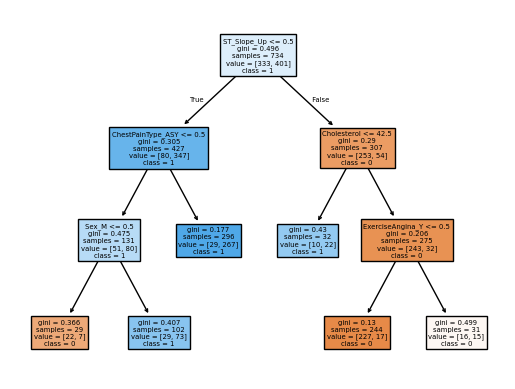

In [2]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

heart_tree = tree.DecisionTreeClassifier(min_impurity_decrease=.01)

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

x = clean_heart.drop('HeartDisease', axis=1)
y = clean_heart['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(x_train[categorical_cols])

encoded_col_names = encoder.get_feature_names_out(categorical_cols)

encoded_x_train = pd.DataFrame(
    encoder.transform(x_train[categorical_cols]),
    index=x_train.index,
    columns=encoded_col_names
)
encoded_x_test = pd.DataFrame(
    encoder.transform(x_test[categorical_cols]),
    index=x_test.index,
    columns=encoded_col_names
)

x_train = pd.concat([x_train.drop(categorical_cols, axis=1), encoded_x_train], axis=1)
x_test  = pd.concat([x_test .drop(categorical_cols, axis=1), encoded_x_test ], axis=1)


heart_tree = tree.DecisionTreeClassifier(min_impurity_decrease=.01)
heart_tree.fit(x_train, y_train)

tree_text = tree.export_text(heart_tree, feature_names=list(x_train.columns))
print(tree_text)

tree.plot_tree(heart_tree, feature_names=list(x_train.columns), class_names=["0","1"],
                   filled=True)


In [3]:
from sklearn.metrics import classification_report


y_prediction = heart_tree.predict(x_test)

performance_report = classification_report(y_prediction, y_test)

print("Decision Tree performance report: \n")
print(performance_report)

Decision Tree performance report: 

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        78
           1       0.86      0.87      0.86       106

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [4]:
import pandas as pd

heart_failure = pd.read_csv('heart_failure.csv')

clean_heart_failure = heart_failure.dropna()

clean_heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


|--- serum_creatinine <= 1.81
|   |--- ejection_fraction <= 32.50
|   |   |--- serum_creatinine <= 0.95
|   |   |   |--- class: 0
|   |   |--- serum_creatinine >  0.95
|   |   |   |--- class: 1
|   |--- ejection_fraction >  32.50
|   |   |--- age <= 79.50
|   |   |   |--- class: 0
|   |   |--- age >  79.50
|   |   |   |--- class: 1
|--- serum_creatinine >  1.81
|   |--- class: 1



[Text(0.625, 0.875, 'serum_creatinine <= 1.815\ngini = 0.418\nsamples = 239\nvalue = [168, 71]\nclass = 0'),
 Text(0.5, 0.625, 'ejection_fraction <= 32.5\ngini = 0.331\nsamples = 201\nvalue = [159, 42]\nclass = 0'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'serum_creatinine <= 0.95\ngini = 0.491\nsamples = 53\nvalue = [30, 23]\nclass = 0'),
 Text(0.125, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = 1'),
 Text(0.75, 0.375, 'age <= 79.5\ngini = 0.224\nsamples = 148\nvalue = [129, 19]\nclass = 0'),
 Text(0.625, 0.125, 'gini = 0.149\nsamples = 136\nvalue = [125, 11]\nclass = 0'),
 Text(0.875, 0.125, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = 1'),
 Text(0.75, 0.625, 'gini = 0.361\nsamples = 38\nvalue = [9, 29]\nclass = 1'),
 Text(0.6875, 0.75, '  False')]

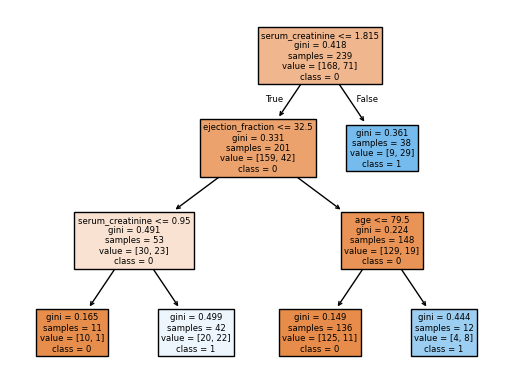

In [5]:
# from sklearn import tree
# from sklearn.model_selection import train_test_split

heart_failure_tree = tree.DecisionTreeClassifier(min_impurity_decrease=.01)

x = clean_heart_failure.drop(['DEATH_EVENT', 'time'], axis=1)
y = clean_heart_failure['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

heart_failure_tree.fit(x_train, y_train)

tree_text = tree.export_text(heart_failure_tree, feature_names=list(x_train.columns))

print(tree_text)

tree.plot_tree(heart_failure_tree, feature_names=list(x_train.columns), class_names=["0","1"],
                   filled=True)


In [6]:
y_prediction = heart_failure_tree.predict(x_test)

performance_report = classification_report(y_prediction, y_test)

print("Decision Tree performance report: \n")
print(performance_report)

Decision Tree performance report: 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        37
           1       0.64      0.70      0.67        23

    accuracy                           0.73        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.74      0.73      0.74        60

